# Credit EDA Case Study 

## 1. Import Library

In [1]:
import pandas as pd,numpy as np,matplotlib.pyplot as plt,seaborn as sns
from pylab import *
%pylab inline
import warnings
warnings.filterwarnings("ignore")

Populating the interactive namespace from numpy and matplotlib


/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['linalg', 'random', 'power', 'fft']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [2]:
# Importing Data Set
AData = pd.read_csv("application_data.csv")
PData = pd.read_csv("previous_application.csv")

## 2. Data Inspection

In [3]:
# Data set Shape
AData.shape

(307511, 122)

In [4]:
# Data set Head
AData.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Data set Head
PData.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Describe Dataset
AData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
# Describe Dataset
PData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

## 3. Handling Missing Values

## <font color='blue'>3.1 Finding Columns where null values are more than 40%</font>

In [8]:
# Find null values above 40%
nulldata = pd.DataFrame((100*AData.isnull().sum()/len(AData)).round(2),columns=["Null"])
nulldata[nulldata["Null"]>40].sort_values(by="Null",ascending=False)

,Null
COMMONAREA_AVG,69.87
COMMONAREA_MEDI,69.87
COMMONAREA_MODE,69.87
NONLIVINGAPARTMENTS_MEDI,69.43
NONLIVINGAPARTMENTS_MODE,69.43
NONLIVINGAPARTMENTS_AVG,69.43
FONDKAPREMONT_MODE,68.39
LIVINGAPARTMENTS_MEDI,68.35
LIVINGAPARTMENTS_AVG,68.35
LIVINGAPARTMENTS_MODE,68.35


## <font color='blue'>3.2 Dropping Columns where null values are more than 40 %</font>

In [9]:
# Getting Columns Name
nulldata[nulldata["Null"]>40].index

Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FO

- **We are dropping above columns because these are related to home description which is not required for Analysis.**

In [10]:
AData.drop(nulldata[nulldata["Null"]>40].index,axis=1,inplace=True)

 - **Checking Remaining Columns.**

In [11]:
AData.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

In [12]:
col5=[]
for i in AData.columns:
    if i.startswith("FLAG_DOCUMENT"):
        col5.append(i)
AData.drop(col5,axis=1,inplace=True)

In [13]:
AData.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
O

## <font color="blue">**3.3 Imputing missing and incorrect values**</font>

In [14]:
#We Have Imputed with Mode Value
AData.OCCUPATION_TYPE=AData.OCCUPATION_TYPE.fillna(AData.OCCUPATION_TYPE.mode()[0])
AData.NAME_TYPE_SUITE=AData.NAME_TYPE_SUITE.fillna(AData.NAME_TYPE_SUITE.mode()[0])
AData['CNT_FAM_MEMBERS']=AData['CNT_FAM_MEMBERS'].fillna(AData['CNT_FAM_MEMBERS'].mode()[0])

# here gender col contains value with 'XNA' so need to replace.
AData["CODE_GENDER"]=AData["CODE_GENDER"].replace('XNA',AData["CODE_GENDER"].mode()[0])

# Filling Null value with mode
AData['OBS_30_CNT_SOCIAL_CIRCLE']=AData['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(AData['OBS_30_CNT_SOCIAL_CIRCLE'].mode()[0])
AData['DEF_30_CNT_SOCIAL_CIRCLE']=AData['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(AData['DEF_30_CNT_SOCIAL_CIRCLE'].mode()[0])
AData['OBS_60_CNT_SOCIAL_CIRCLE']=AData['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(AData['OBS_60_CNT_SOCIAL_CIRCLE'].mode()[0])
AData['DEF_60_CNT_SOCIAL_CIRCLE']=AData['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(AData['DEF_60_CNT_SOCIAL_CIRCLE'].mode()[0])
AData['DAYS_LAST_PHONE_CHANGE']=AData['DAYS_LAST_PHONE_CHANGE'].fillna(AData['DAYS_LAST_PHONE_CHANGE'].mode()[0])
AData["AMT_REQ_CREDIT_BUREAU_HOUR"]=AData["AMT_REQ_CREDIT_BUREAU_HOUR"].fillna(AData["AMT_REQ_CREDIT_BUREAU_HOUR"].mode()[0])
AData["AMT_REQ_CREDIT_BUREAU_DAY"]=AData["AMT_REQ_CREDIT_BUREAU_DAY"].fillna(AData["AMT_REQ_CREDIT_BUREAU_DAY"].mode()[0])
AData["AMT_REQ_CREDIT_BUREAU_WEEK"]=AData["AMT_REQ_CREDIT_BUREAU_WEEK"].fillna(AData["AMT_REQ_CREDIT_BUREAU_WEEK"].mode()[0])
AData["AMT_REQ_CREDIT_BUREAU_YEAR"]=AData["AMT_REQ_CREDIT_BUREAU_YEAR"].fillna(AData["AMT_REQ_CREDIT_BUREAU_YEAR"].mode()[0])
AData["AMT_REQ_CREDIT_BUREAU_MON"]=AData["AMT_REQ_CREDIT_BUREAU_MON"].fillna(AData["AMT_REQ_CREDIT_BUREAU_MON"].mode()[0])
AData["AMT_REQ_CREDIT_BUREAU_QRT"]=AData["AMT_REQ_CREDIT_BUREAU_QRT"].fillna(AData["AMT_REQ_CREDIT_BUREAU_QRT"].mode()[0])

# These is continous variable so imputed by mean()
AData.AMT_GOODS_PRICE=AData.AMT_GOODS_PRICE.fillna(AData.AMT_GOODS_PRICE.mean())

# Those colums are imputed by median()
AData["EXT_SOURCE_2"]=AData["EXT_SOURCE_2"].fillna(AData["EXT_SOURCE_2"].median())
AData["EXT_SOURCE_3"]=AData["EXT_SOURCE_3"].fillna(AData["EXT_SOURCE_3"].median())
AData["AMT_ANNUITY"]=AData["AMT_ANNUITY"].fillna(AData["AMT_ANNUITY"].median())


In [15]:
#Checking null values
AData.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RAT

## <font color='blue'>3.4 Conversion of Float to Int columns</font>

In [16]:
AData.select_dtypes('object').columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'],
      dtype='object')

In [17]:
#listing Float col
B = AData.select_dtypes('float').columns

In [18]:
#conversion of float columns into integer
AData[B]=AData[B].astype('int')

In [19]:
#dtypes count for application data
AData.dtypes.value_counts()

int64     41
object    12
dtype: int64

## <font color="blue">3.5 Converting numeric to category</font>

In [20]:
#select all numeric col to numeric variable
numeric=AData.select_dtypes(include=[np.int64,np.int32]).columns

In [21]:
#find a unique no data in columns
AData[numeric].nunique()

SK_ID_CURR                     307511
TARGET                              2
CNT_CHILDREN                       15
AMT_INCOME_TOTAL                 2548
AMT_CREDIT                       5603
AMT_ANNUITY                     13672
AMT_GOODS_PRICE                  1003
REGION_POPULATION_RELATIVE          1
DAYS_BIRTH                      17460
DAYS_EMPLOYED                   12574
DAYS_REGISTRATION               15687
DAYS_ID_PUBLISH                  6168
FLAG_MOBIL                          2
FLAG_EMP_PHONE                      2
FLAG_WORK_PHONE                     2
FLAG_CONT_MOBILE                    2
FLAG_PHONE                          2
FLAG_EMAIL                          2
CNT_FAM_MEMBERS                    17
REGION_RATING_CLIENT                3
REGION_RATING_CLIENT_W_CITY         3
HOUR_APPR_PROCESS_START            24
REG_REGION_NOT_LIVE_REGION          2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT

In [22]:
col6=['REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL']
def convert(AData, col6):
    for y in col6:
        AData.loc[:,y].replace((0, 1), ('N', 'Y'), inplace=True)
    return AData
convert(AData, col6)
AData.dtypes.value_counts()        

int64     29
object    24
dtype: int64

In [23]:
#Describe Application data
AData.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,100002.0,189145.5,278202.0,367142.5,456255.0
TARGET,307511.0,0.080729,0.272419,0.0,0.0,0.0,0.0,1.0
CNT_CHILDREN,307511.0,0.417052,0.722121,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,307511.0,168797.917938,237123.146280,25650.0,112500.0,147150.0,202500.0,117000000.0
AMT_CREDIT,307511.0,599025.951241,402490.771175,45000.0,270000.0,513531.0,808650.0,4050000.0
AMT_ANNUITY,307511.0,27108.261682,14493.444921,1615.0,16524.0,24903.0,34596.0,258025.0
AMT_GOODS_PRICE,307511.0,538396.206718,369279.426265,40500.0,238500.0,450000.0,679500.0,4050000.0
REGION_POPULATION_RELATIVE,307511.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
DAYS_BIRTH,307511.0,-16036.995067,4363.988632,-25229.0,-19682.0,-15750.0,-12413.0,-7489.0
DAYS_EMPLOYED,307511.0,63815.045904,141275.766519,-17912.0,-2760.0,-1213.0,-289.0,365243.0


# 4 .Handling Outlier

- **CNT_CHILDREN**

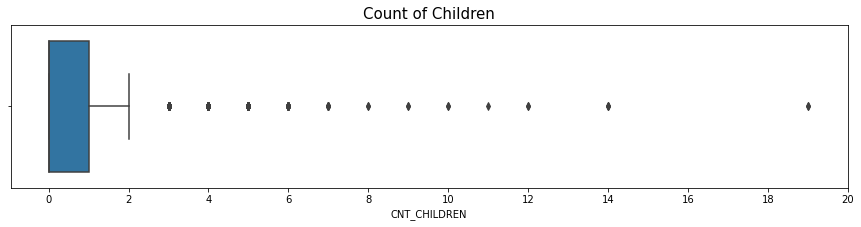

In [24]:
plt.figure(figsize=[15,3])
sns.boxplot("CNT_CHILDREN",data=AData);
plt.xticks(np.arange(0,21,2));
plt.title("Count of Children",fontsize=15);

In [25]:
#we found a outlier in the col
AData=AData[AData["CNT_CHILDREN"]<=AData["CNT_CHILDREN"].quantile([0.99][0])]

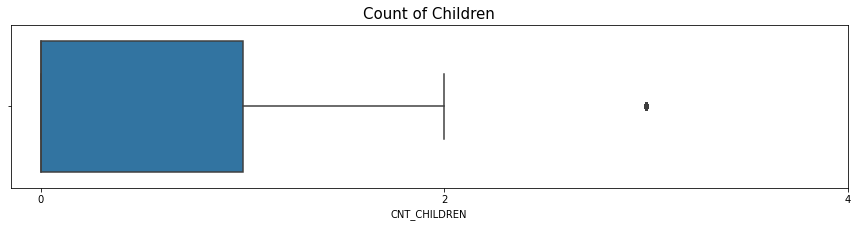

In [26]:
plt.figure(figsize=[15,3])
sns.boxplot("CNT_CHILDREN",data=AData);
plt.xticks(np.arange(0,5,2));
plt.title("Count of Children",fontsize=15);

- **AMT_INCOME_TOTAL**

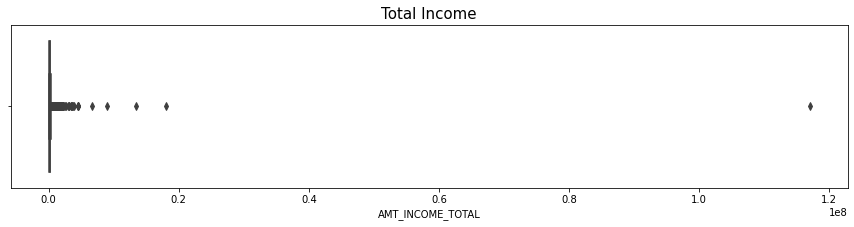

In [27]:
plt.figure(figsize=[15,3])
sns.boxplot("AMT_INCOME_TOTAL",data=AData);
plt.title("Total Income",fontsize=15);

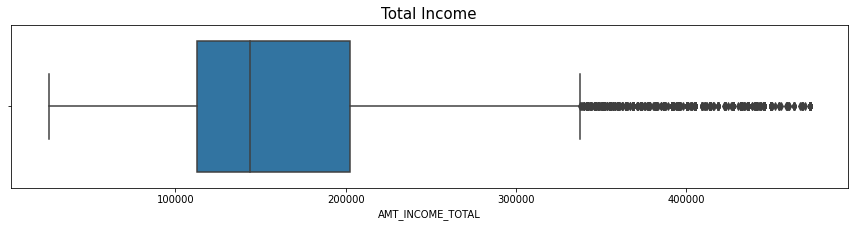

In [28]:
#here outlier present in the graph 
AData=AData[AData["AMT_INCOME_TOTAL"]<=AData["AMT_INCOME_TOTAL"].quantile([0.99][0])]
plt.figure(figsize=[15,3])
sns.boxplot("AMT_INCOME_TOTAL",data=AData);
plt.title("Total Income",fontsize=15);

- **AMT_ANNUITY**

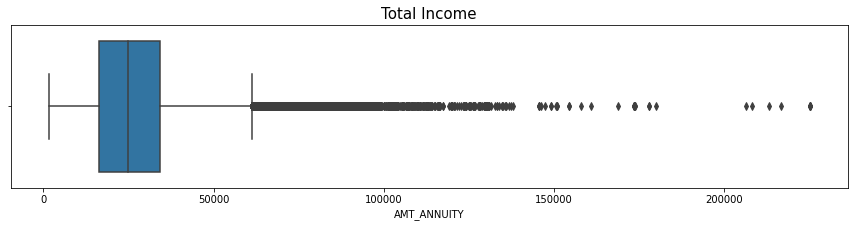

In [29]:
plt.figure(figsize=[15,3])
sns.boxplot("AMT_ANNUITY",data=AData);
plt.title("Total Income",fontsize=15);

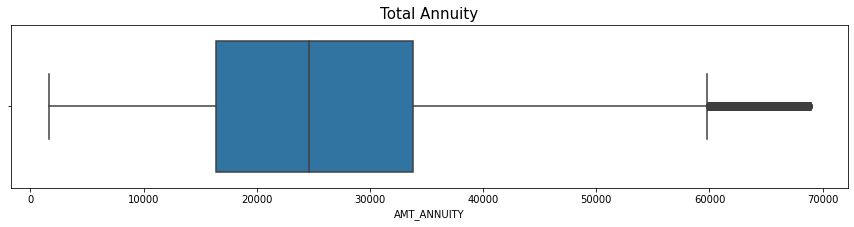

In [30]:
AData=AData[AData["AMT_ANNUITY"]<=AData["AMT_ANNUITY"].quantile([0.99][0])]
plt.figure(figsize=[15,3])
sns.boxplot("AMT_ANNUITY",data=AData);
plt.title("Total Annuity",fontsize=15);

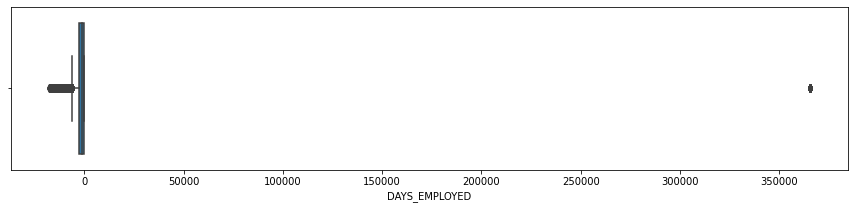

In [31]:
plt.figure(figsize=[15,3])
sns.boxplot(AData["DAYS_EMPLOYED"]);

- **Here a we want negetive values but here present positive value at 350000**

In [32]:
AData["DAYS_EMPLOYED"].quantile([0.99][0])

365243.0

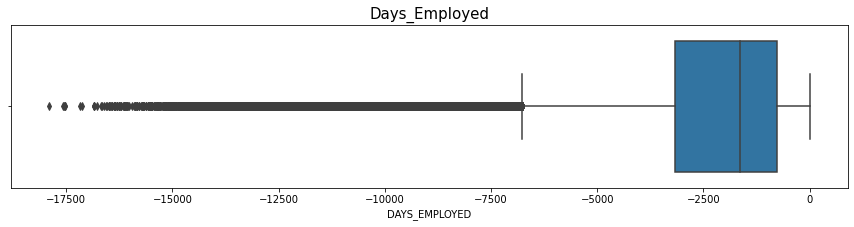

In [33]:
AData=AData[AData["DAYS_EMPLOYED"]<AData["DAYS_EMPLOYED"].quantile([0.99][0])]
plt.figure(figsize=[15,3])
sns.boxplot(AData["DAYS_EMPLOYED"]);
plt.title("Days_Employed",fontsize=15);

## <font color='blue'>Bining continous Variables</font>

In [34]:
AData["AMT_INCOME_TOTAL"].describe().T

count    246128.000000
mean     167999.075367
std       76933.718516
min       25650.000000
25%      112500.000000
50%      157500.000000
75%      202500.000000
max      472500.000000
Name: AMT_INCOME_TOTAL, dtype: float64

In [35]:
AData.insert(9,column="Income_Range",value=pd.qcut(AData.loc[:,"AMT_INCOME_TOTAL"],q=[0,0.25,0.50,0.75,0.90,1],labels=["Very_Low",'Low',"Medium","High","Very_High"]))

In [36]:
AData["Income_Range"].value_counts()

Very_Low     72983
Low          68543
Medium       45504
High         38503
Very_High    20595
Name: Income_Range, dtype: int64

In [37]:
AData.insert(9,column="Credit_Range",value=pd.qcut(AData["AMT_CREDIT"],q=[0,0.25,0.50,0.75,0.90,1],labels=["Very_Low",'Low',"Medium","High","Very_High"]))

In [38]:
AData["Credit_Range"].value_counts()

Medium       62028
Very_Low     61748
Low          61361
High         36540
Very_High    24451
Name: Credit_Range, dtype: int64

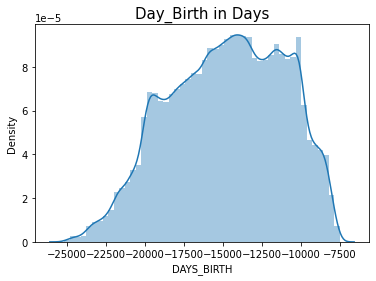

In [39]:
#Here DAYS_BIRTH is in days we convert it into year
sns.distplot(AData['DAYS_BIRTH']);
plt.title("Day_Birth in Days",fontsize=15);

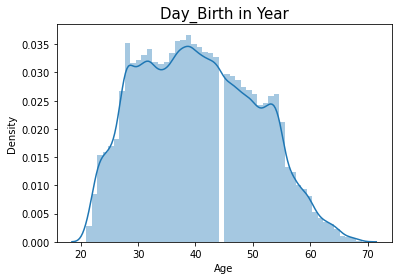

In [40]:
AData["Age"]=round(AData["DAYS_BIRTH"]/-365)
sns.distplot(AData["Age"]);
plt.title("Day_Birth in Year",fontsize=15);

In [41]:
#Grouping the age
AData["AGE_GROUP"]=pd.cut(AData.Age,bins=np.linspace(20,70,num=11))

In [42]:
AData["AGE_GROUP"].value_counts()

(35.0, 40.0]    41733
(40.0, 45.0]    38790
(30.0, 35.0]    38364
(25.0, 30.0]    33979
(45.0, 50.0]    32748
(50.0, 55.0]    28803
(20.0, 25.0]    14070
(55.0, 60.0]    12607
(60.0, 65.0]     4382
(65.0, 70.0]      652
Name: AGE_GROUP, dtype: int64

# 5. Checking Imbalance Ratio For Target

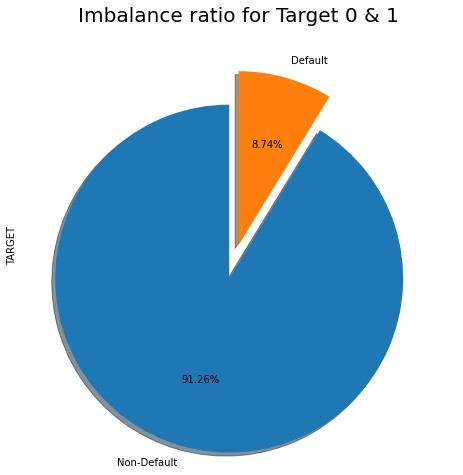

In [43]:
plt.figure(figsize=[8,8])
AData["TARGET"].value_counts(normalize=True).plot.pie(autopct="%.2f%%",labels=["Non-Default","Default"],explode=[0.2,0],startangle=90,shadow=True);
plt.title("Imbalance ratio for Target 0 & 1",fontsize=20);

**`inference`**
- **Here imbalance ratio for target variable is 91.26:8.74=10.44**

# 6. Spliting Data for Default and Non-Default

In [44]:
target0=AData[AData["TARGET"]==0]
target1=AData[AData["TARGET"]==1]

## 7.1 Univariate- Categorical variables 

In [45]:
def barfunc(var):
    plt.figure(figsize=[15,5])
    plt.subplot(1,2,1)
    sns.countplot(var,data=target0)
    plt.title("Distribution of "+"%s"%var+" Non-Default",fontsize=15)
    plt.xlabel(var)
    plt.xticks(rotation=90)
    plt.ylabel("No of Defaulters")
    plt.subplot(1,2,2)
    sns.countplot(var,data=target1)
    plt.title("Distribution of "+"%s"%var+" Default",fontsize=15)
    plt.xlabel(var)
    plt.xticks(rotation=90)
    plt.ylabel("No of Defaulters")
    plt.show()

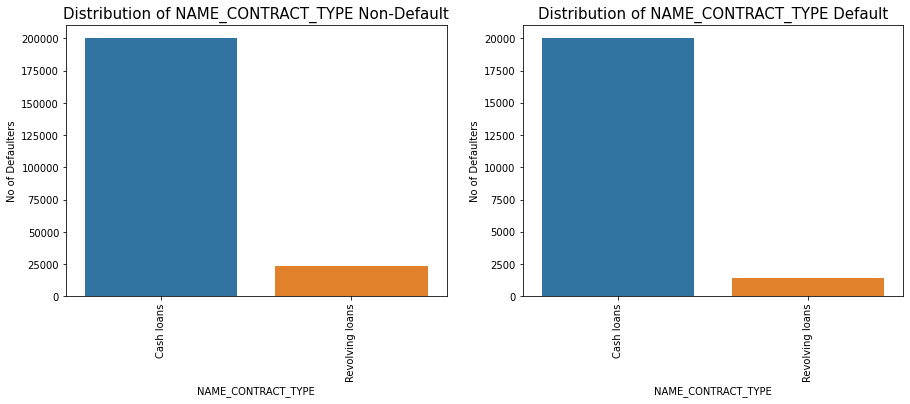

In [46]:
barfunc("NAME_CONTRACT_TYPE")

**`inference`**
- **Here we observed revolving loan is less in deaulters as compared to non-defaulter.hence we say company safer at revolving loan.This may be occure because revolving payment and re-borrowing facilty**

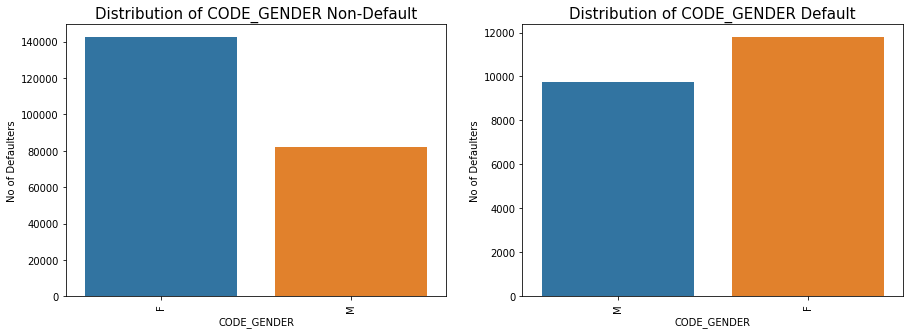

In [47]:
barfunc("CODE_GENDER")

- **we observed that male is greter in defaulters.but in both case female are same in proportion.**

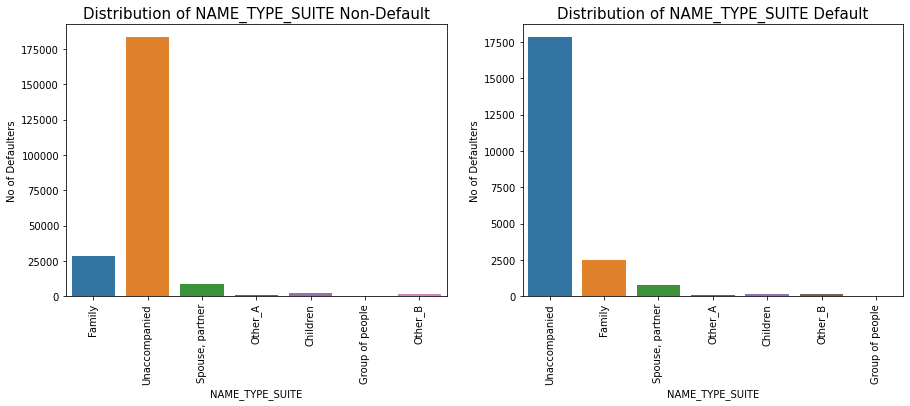

In [48]:
barfunc("NAME_TYPE_SUITE")

- **As we know who comes with client or customer are not affected in defaulters of loan ,as we see both are in same proportions**

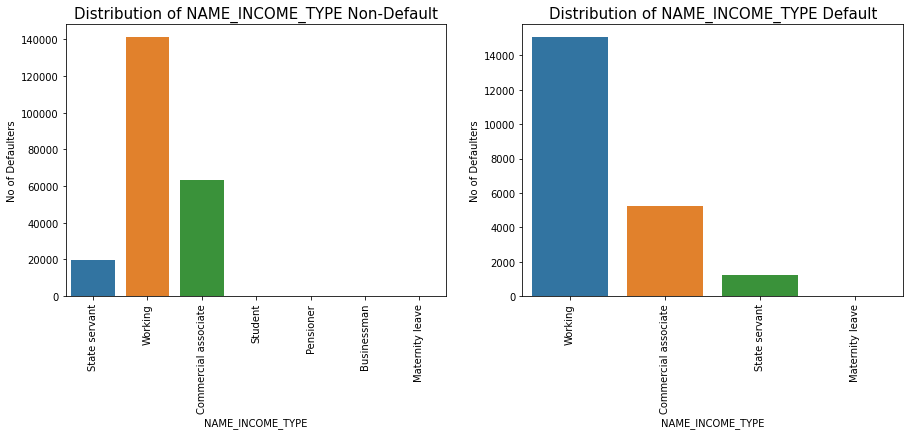

In [49]:
barfunc("NAME_INCOME_TYPE")

- **Here we observed that most of defaulters from working type.In Non-defaulter Student,Pensioner, Business man are loyal to company means those are pay the loan regularly.A less defaulters from Maternity leave.**

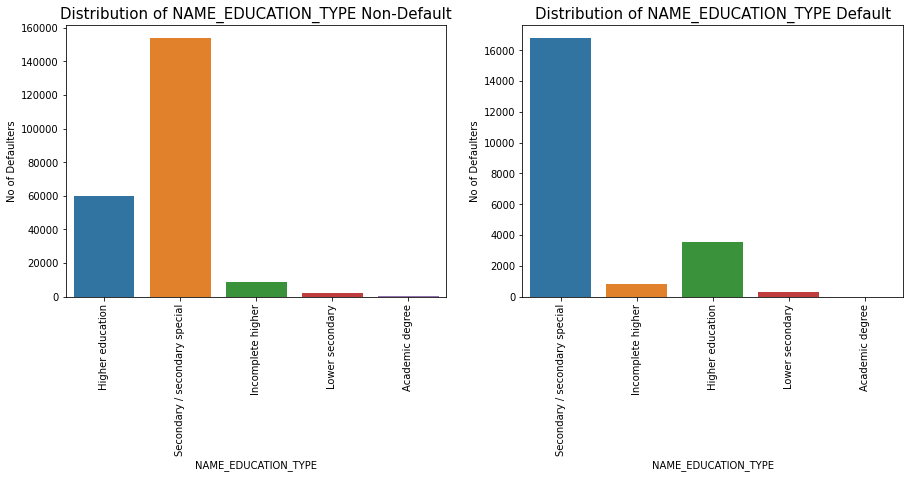

In [50]:
barfunc("NAME_EDUCATION_TYPE")

- **These is orderd type of data.We observed that secoundary special having more defaulters.Here we notice that Higher education is lesser in defaulter.because they are have well job so they pay loan regularly**

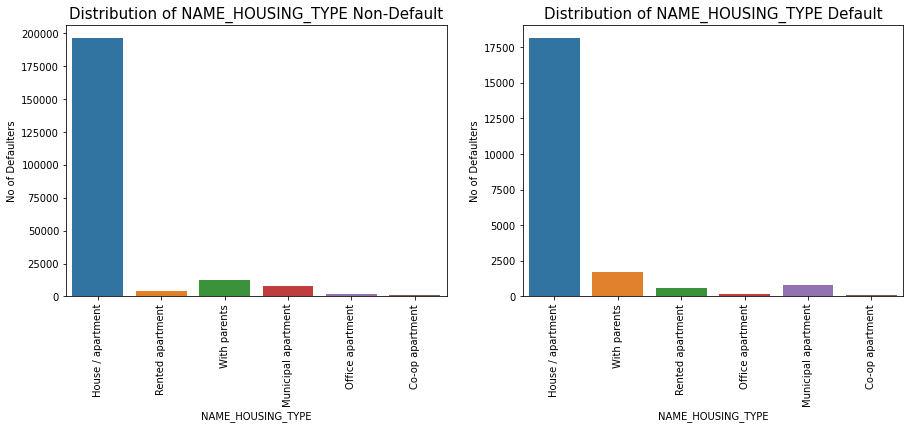

In [51]:
barfunc("NAME_HOUSING_TYPE")

**`inference`**
- **Here we notice that with_parents,rented apartment are higher in defaulter than non-defaulter.Rented people income they are split in to pay rent and not remaining income to pay the loan,And for with_parent parent has least income.** 

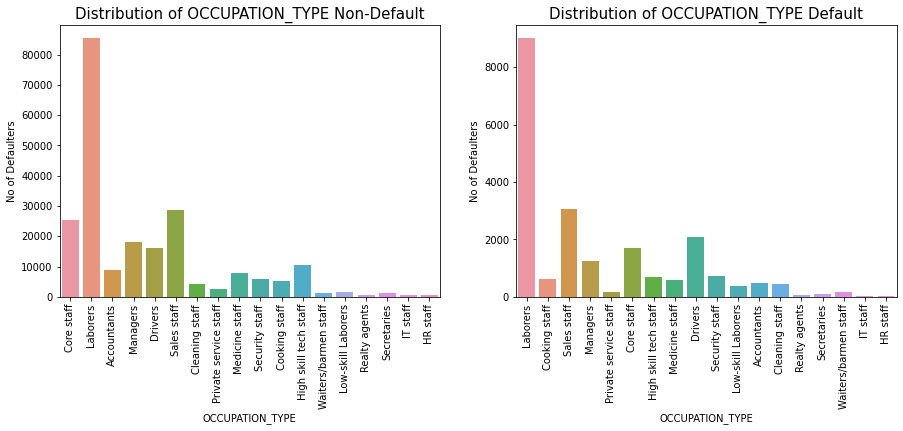

In [52]:
barfunc("OCCUPATION_TYPE")

**`inference`**
- **We notice that Labores are higher in Default.Here managers,Private service staff,High_skill tech staff are lesser in Default than Non-Default**

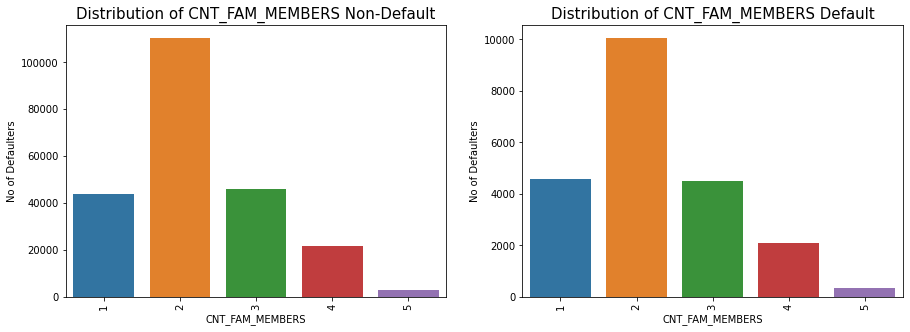

In [53]:
barfunc("CNT_FAM_MEMBERS")

**`inference`**
- **Here Childeren count seen to be impact on default rate.As the higher count of children leads to more in deafulters as compared to non-defaulter**

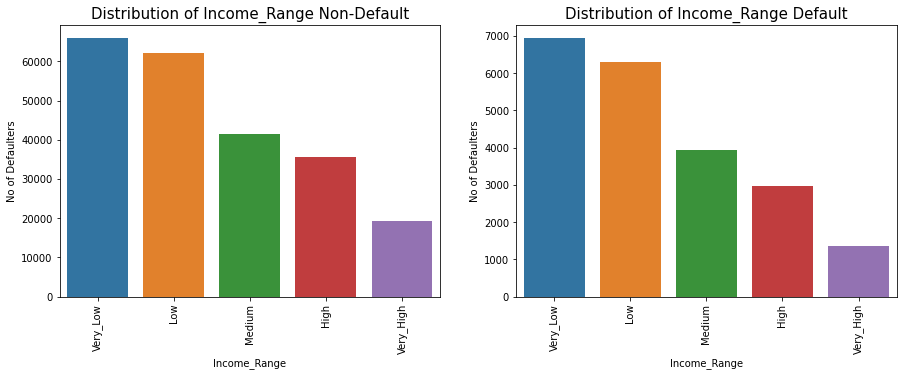

In [54]:
barfunc("Income_Range")


**`inference`**
- **Here we noticed lower income range has higher count defaulters .And there count be more than count of non-Defaulters.**

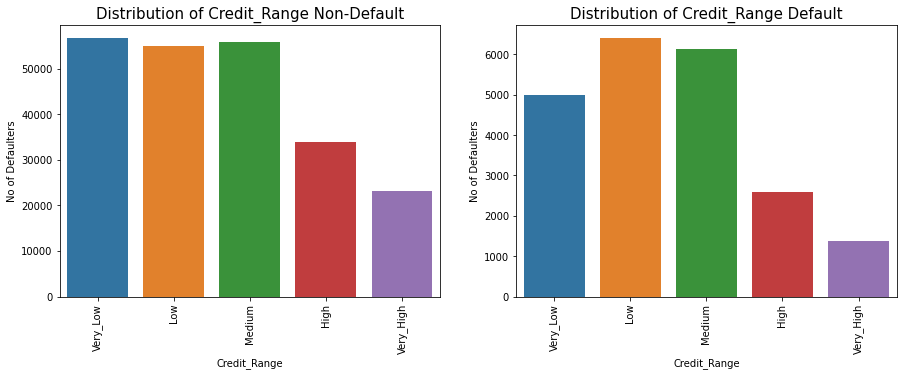

In [55]:
barfunc("Credit_Range")

**`inference`**
- **We notice that Lower credit means more in default**

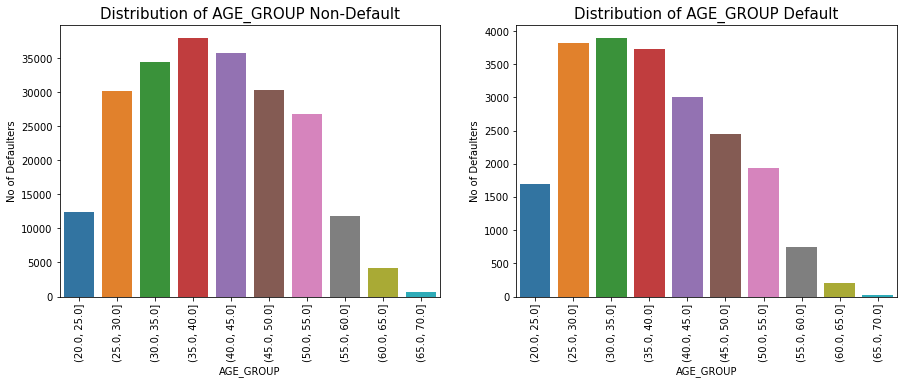

In [56]:
barfunc("AGE_GROUP")

**`inference`**
- **Here we notice that age_range between 20 to 35 age group people are higher in deafulter.**
- **But above 35 to 70 age_range people are lesser in default because of they have experience about paying the loan,how to manage income.**

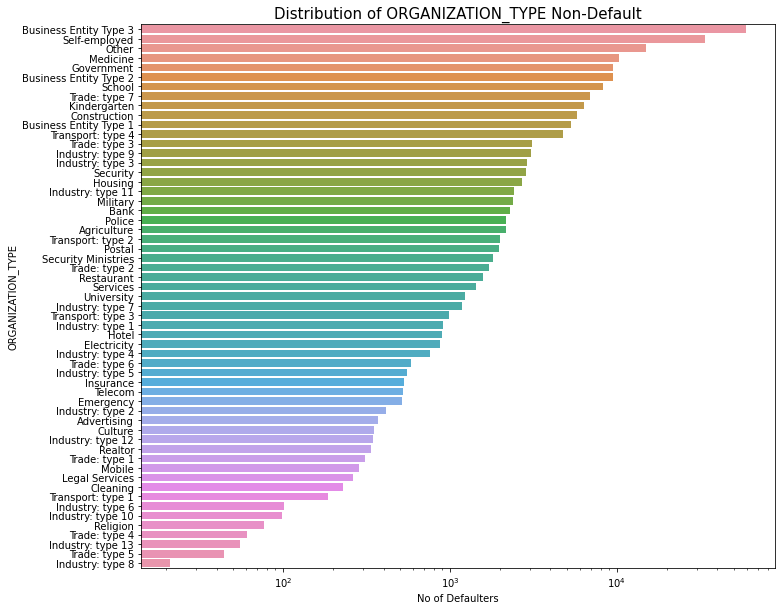

In [57]:
plt.figure(figsize=[25,10])
plt.subplot(1,2,1)
sns.countplot(y='ORGANIZATION_TYPE',data=target0,order=target0['ORGANIZATION_TYPE'].value_counts().index)
plt.title("Distribution of ORGANIZATION_TYPE Non-Default",fontsize=15)
plt.ylabel('ORGANIZATION_TYPE')
plt.xlabel("No of Defaulters");
plt.xscale('log')

**`inference`**
- **Here more non-defaulters who applying for the loan from organization type are Business Type 3,Self-employed,Other,Medicine,Government**
- **And Least for Industry type-1,type-10,type-13,type-8,Religion,Trade-type 4,5** 

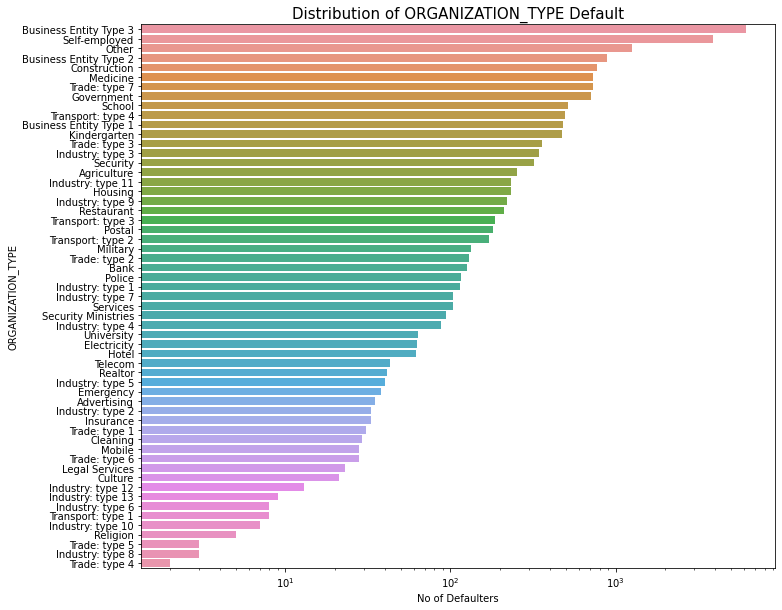

In [58]:
plt.figure(figsize=[25,10])
plt.subplot(1,2,1)
sns.countplot(y='ORGANIZATION_TYPE',data=target1,order=target1['ORGANIZATION_TYPE'].value_counts().index)
plt.title("Distribution of ORGANIZATION_TYPE Default",fontsize=15)
plt.ylabel('ORGANIZATION_TYPE')
plt.xlabel("No of Defaulters");
plt.xscale('log')

**`inference`**
- **Here more non-defaulters who applying for the loan from organization type are Business Type 3,Type 2,Self-employed,Other,Construction.**
- **And Least for Industry type-1,type-10,type-13,type-8,Religion,Trade-type 4,5.** 

## 7.2 Univariate- Continous variables 

In [59]:
def histfunc(var):
    plt.figure(figsize=[15,5])
    plt.subplot(1,2,1)
    sns.distplot(target0[var])
    #target0[var].plot.hist()
    plt.title("Distribution of "+"%s"%var+" Non-Default",fontsize=15)
    plt.xlabel(var)
    plt.xticks(rotation=90)
    plt.ylabel("No of Defaulters")
    plt.subplot(1,2,2)
    sns.distplot(target1[var])
    plt.title("Distribution of "+"%s"%var+" Default",fontsize=15)
    plt.xlabel(var)
    plt.xticks(rotation=90)
    plt.ylabel("No of Defaulters")
    plt.show()    

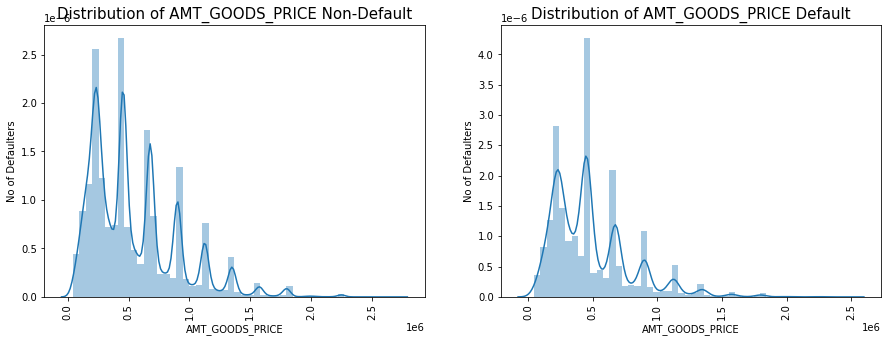

In [60]:
histfunc("AMT_GOODS_PRICE")

**`inference`**
- **Here le6 as if 0.5 then it will be 500,000.**
- **Here we see higher good price for defaulter for price in between 0 to 5,00,000 lakh.**

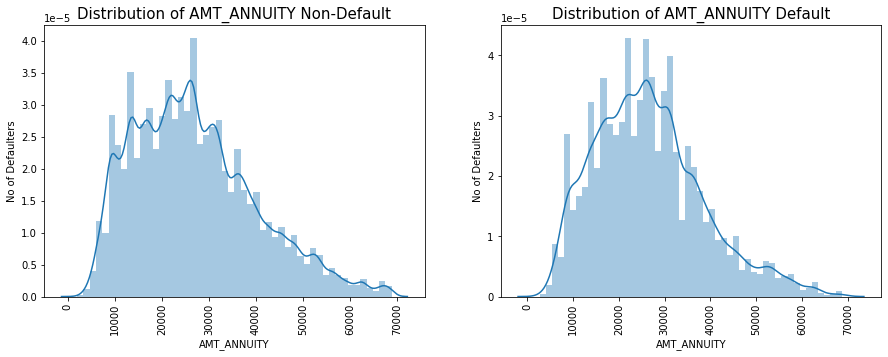

In [61]:
histfunc("AMT_ANNUITY")   

**`inference`**
- **Here we see Defaults are higher at 18000 to 32000 Annuity.**

# Segmented Analysis

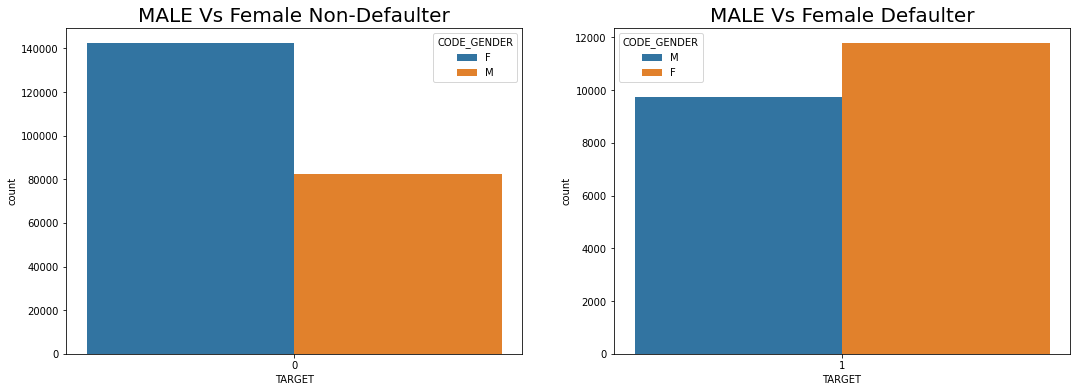

In [62]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.countplot(x='TARGET',hue='CODE_GENDER',data=target0)
plt.title("MALE Vs Female Non-Defaulter",fontsize=20)
plt.subplot(1,2,2)
sns.countplot(x='TARGET',hue='CODE_GENDER',data=target1)
plt.title("MALE Vs Female Defaulter",fontsize=20)
plt.show()

**`inference`**
- **we cannot says about gender as default and non-default both are same in patter.**

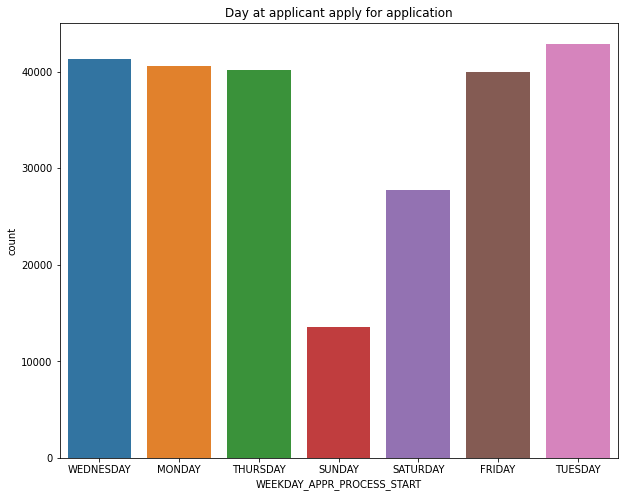

In [63]:
plt.figure(figsize=[10,8])
sns.countplot(AData["WEEKDAY_APPR_PROCESS_START"],data=AData)
plt.title("Day at applicant apply for application",fontsize=12);

**`inference :`**
- **Here we observed that client comes more at day of Tuesday, Wednesday and lesser in sunday ,saterday beacuse of those are weekends .**

# Bivariate Analysis
### - **continous-continous variable**

In [64]:
def bivariate(var1,var2):
    plt.figure(figsize=[20,10])
    plt.subplot(1,2,1)
    sns.scatterplot(x=var1,y=var2,data=target0)
    plt.title("Non-Default"+"%s"%var1+"vs"+"%s"%var2,fontsize=20)
    plt.subplot(1,2,2)
    sns.scatterplot(x=var1,y=var2,data=target1)
    plt.title("Non-Default"+"%s"%var1+"vs"+"%s"%var2,fontsize=20)
    plt.show()

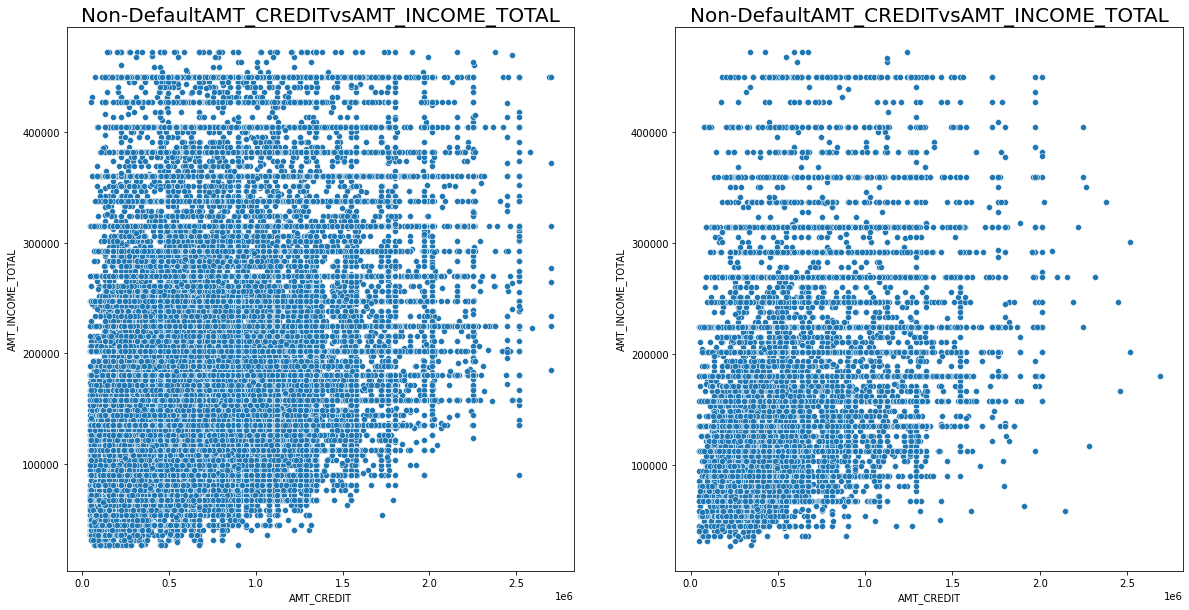

In [65]:
bivariate("AMT_CREDIT","AMT_INCOME_TOTAL")

**`inference`**
- **here we see higher density at below 300000 and below 2000000.**

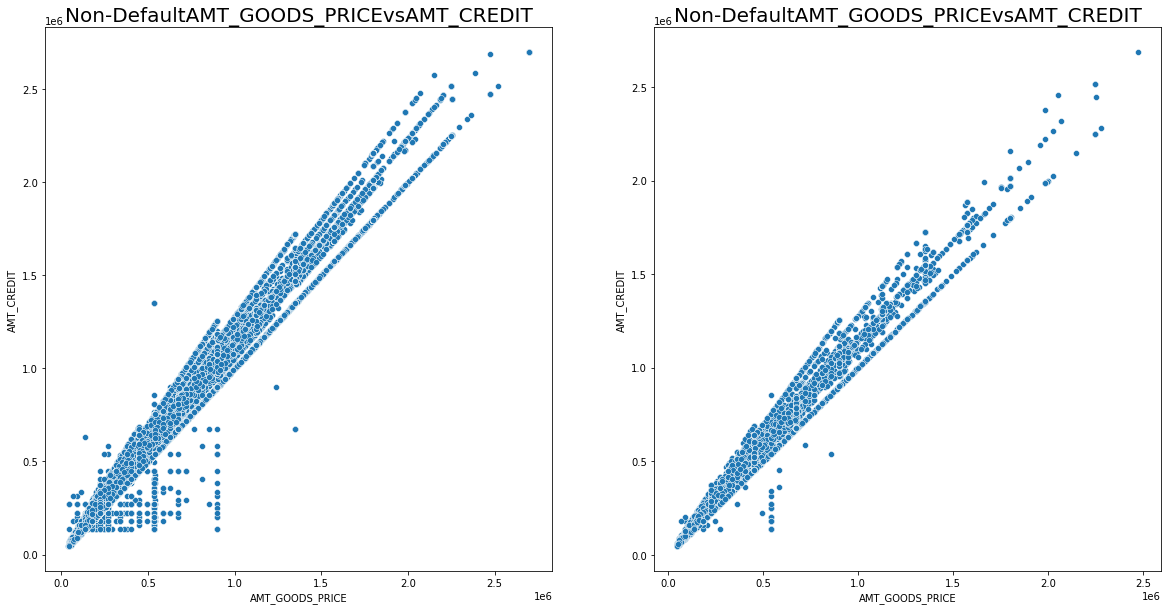

In [66]:
bivariate("AMT_GOODS_PRICE","AMT_CREDIT")

**`inference`**
- **Here Good_price is incresses with credit amount be increses.**

# Correlation for both Default and Non-Default group

In [67]:
nCorr=target0.select_dtypes(include=[np.int32,np.int64]).columns

In [68]:
nonDef_df=target0[nCorr]
nonDef_corr=nonDef_df.corr()
round(nonDef_corr,3)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000,NaN,0.001,0.002,0.000,0.001,0.001,NaN,-0.001,-0.000,...,0.002,0.000,0.004,0.000,-0.002,-0.002,0.001,0.000,0.000,0.002
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,0.001,NaN,1.000,-0.018,-0.019,-0.009,-0.023,NaN,0.249,0.065,...,0.004,0.021,0.002,-0.003,-0.001,0.000,-0.000,-0.018,-0.001,-0.022
AMT_INCOME_TOTAL,0.002,NaN,-0.018,1.000,0.372,0.440,0.375,NaN,-0.052,-0.035,...,-0.031,-0.029,-0.031,-0.052,0.005,0.007,0.012,0.068,0.027,0.073
AMT_CREDIT,0.000,NaN,-0.019,0.372,1.000,0.780,0.985,NaN,-0.153,-0.088,...,-0.019,0.002,-0.022,-0.074,-0.003,0.005,0.000,0.052,0.025,-0.022
AMT_ANNUITY,0.001,NaN,-0.009,0.440,0.780,1.000,0.778,NaN,-0.092,-0.051,...,-0.019,-0.008,-0.021,-0.067,0.005,0.003,0.015,0.032,0.017,0.007
AMT_GOODS_PRICE,0.001,NaN,-0.023,0.375,0.985,0.778,1.000,NaN,-0.147,-0.089,...,-0.020,0.002,-0.023,-0.077,-0.002,0.006,0.001,0.054,0.025,-0.024
REGION_POPULATION_RELATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DAYS_BIRTH,-0.001,NaN,0.249,-0.052,-0.153,-0.092,-0.147,NaN,1.000,0.353,...,0.015,0.018,0.015,0.137,0.000,0.001,-0.004,-0.033,-0.009,-0.070
DAYS_EMPLOYED,-0.000,NaN,0.065,-0.035,-0.088,-0.051,-0.089,NaN,0.353,1.000,...,0.007,-0.001,0.009,0.136,-0.003,0.001,-0.002,-0.030,-0.002,-0.025


In [69]:
top10_NonDef=nonDef_corr.unstack()
top10_NonDef.sort_values(ascending=False).drop_duplicates()[:20]

AMT_REQ_CREDIT_BUREAU_YEAR  AMT_REQ_CREDIT_BUREAU_YEAR     1.000000
OBS_30_CNT_SOCIAL_CIRCLE    OBS_60_CNT_SOCIAL_CIRCLE       0.998501
AMT_CREDIT                  AMT_GOODS_PRICE                0.985459
REGION_RATING_CLIENT        REGION_RATING_CLIENT_W_CITY    0.949177
CNT_FAM_MEMBERS             CNT_CHILDREN                   0.887984
DEF_60_CNT_SOCIAL_CIRCLE    DEF_30_CNT_SOCIAL_CIRCLE       0.861795
AMT_CREDIT                  AMT_ANNUITY                    0.780435
AMT_ANNUITY                 AMT_GOODS_PRICE                0.778474
                            AMT_INCOME_TOTAL               0.440375
AMT_GOODS_PRICE             AMT_INCOME_TOTAL               0.375184
AMT_INCOME_TOTAL            AMT_CREDIT                     0.371691
DAYS_BIRTH                  DAYS_EMPLOYED                  0.352814
OBS_60_CNT_SOCIAL_CIRCLE    DEF_30_CNT_SOCIAL_CIRCLE       0.336068
DEF_30_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE       0.333859
DAYS_REGISTRATION           DAYS_BIRTH          

### **TOP 10 Correlation for Non-Default columns**
1. `OBS_30_CNT_SOCIAL_CIRCLE`-`OBS_60_CNT_SOCIAL_CIRCLE`-`0.998501`
2. `AMT_CREDIT`-`AMT_GOODS_PRICE`-`0.985459`
3. `REGION_RATING`-`CLIENT-REGION_RATING_CLIENT_W_CITY`-`0.949177`
4. `CNT_FAM_MEMBERS`-`CNT_CHILDREN`-`0.887984`
5. `AMT_CREDIT`-`AMT_ANNUITY`-`0.780435`
6. `AMT_ANNUITY`-`AMT_GOODS_PRICE`-`0.778474`
7. `AMT_GOODS_PRICE`-`AMT_INCOME_TOTAL`-`0.375184`
8. `AMT_INCOME_TOTAL`-`AMT_CREDIT`-`0.371691`
9. `DAYS_BIRTH`-`DAYS_EMPLOYED`-`0.352814`
10. `OBS_60_CNT_SOCIAL_CIRCLE`-`DEF_30_CNT_SOCIAL_CIRCLE`-`0.336068`

# Correlation for Default

In [70]:
nCorrD=target1.select_dtypes(include=[np.int32,np.int64]).columns
Def_df=target1[nCorrD]
Def_corr=Def_df.corr()
round(Def_corr,3)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000,NaN,-0.004,-0.004,-0.002,-0.011,-0.002,NaN,-0.005,0.000,...,-0.002,-0.005,-0.008,-0.002,-0.014,-0.004,-0.005,0.004,-0.004,0.005
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,-0.004,NaN,1.000,-0.027,0.001,0.018,-0.005,NaN,0.185,0.037,...,0.003,0.031,-0.004,0.010,0.001,-0.008,-0.003,-0.018,-0.010,-0.013
AMT_INCOME_TOTAL,-0.004,NaN,-0.027,1.000,0.340,0.408,0.342,NaN,-0.099,-0.029,...,-0.028,-0.008,-0.026,-0.082,0.011,-0.000,0.022,0.074,0.031,0.095
AMT_CREDIT,-0.002,NaN,0.001,0.340,1.000,0.753,0.981,NaN,-0.190,-0.108,...,-0.030,0.020,-0.033,-0.117,-0.005,-0.001,0.013,0.064,-0.004,-0.003
AMT_ANNUITY,-0.011,NaN,0.018,0.408,0.753,1.000,0.750,NaN,-0.091,-0.051,...,-0.021,0.009,-0.024,-0.084,0.011,-0.003,0.037,0.054,-0.004,0.002
AMT_GOODS_PRICE,-0.002,NaN,-0.005,0.342,0.981,0.750,1.000,NaN,-0.186,-0.115,...,-0.024,0.021,-0.027,-0.124,-0.004,0.000,0.015,0.067,-0.002,-0.006
REGION_POPULATION_RELATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DAYS_BIRTH,-0.005,NaN,0.185,-0.099,-0.190,-0.091,-0.186,NaN,1.000,0.308,...,0.011,-0.010,0.013,0.147,0.010,-0.000,-0.001,-0.032,-0.018,-0.094
DAYS_EMPLOYED,0.000,NaN,0.037,-0.029,-0.108,-0.051,-0.115,NaN,0.308,1.000,...,-0.000,-0.031,-0.001,0.170,0.007,-0.008,-0.013,-0.029,0.009,-0.046


In [71]:
top10_Def=nonDef_corr.unstack()
top10_Def.sort_values(ascending=False).drop_duplicates()[:15]

AMT_REQ_CREDIT_BUREAU_YEAR  AMT_REQ_CREDIT_BUREAU_YEAR     1.000000
OBS_30_CNT_SOCIAL_CIRCLE    OBS_60_CNT_SOCIAL_CIRCLE       0.998501
AMT_CREDIT                  AMT_GOODS_PRICE                0.985459
REGION_RATING_CLIENT        REGION_RATING_CLIENT_W_CITY    0.949177
CNT_FAM_MEMBERS             CNT_CHILDREN                   0.887984
DEF_60_CNT_SOCIAL_CIRCLE    DEF_30_CNT_SOCIAL_CIRCLE       0.861795
AMT_CREDIT                  AMT_ANNUITY                    0.780435
AMT_ANNUITY                 AMT_GOODS_PRICE                0.778474
                            AMT_INCOME_TOTAL               0.440375
AMT_GOODS_PRICE             AMT_INCOME_TOTAL               0.375184
AMT_INCOME_TOTAL            AMT_CREDIT                     0.371691
DAYS_BIRTH                  DAYS_EMPLOYED                  0.352814
OBS_60_CNT_SOCIAL_CIRCLE    DEF_30_CNT_SOCIAL_CIRCLE       0.336068
DEF_30_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE       0.333859
DAYS_REGISTRATION           DAYS_BIRTH          

### **TOP 10 Correlation for Default columns**
1. `OBS_30_CNT_SOCIAL_CIRCLE`-`OBS_60_CNT_SOCIAL_CIRCLE`-`0.998501`
2. `AMT_CREDIT`-`AMT_GOODS_PRICE`-`0.985459`
3. `REGION_RATING`-`CLIENT-REGION_RATING_CLIENT_W_CITY`-`0.949177`
4. `CNT_FAM_MEMBERS`-`CNT_CHILDREN`-`0.887984`
5. `AMT_CREDIT`-`AMT_ANNUITY`-`0.780435`
6. `AMT_ANNUITY`-`AMT_GOODS_PRICE`-`0.778474`
7. `AMT_GOODS_PRICE`-`AMT_INCOME_TOTAL`-`0.375184`
8. `AMT_INCOME_TOTAL`-`AMT_CREDIT`-`0.371691`
9. `DAYS_BIRTH`-`DAYS_EMPLOYED`-`0.352814`
10. `OBS_60_CNT_SOCIAL_CIRCLE`-`DEF_30_CNT_SOCIAL_CIRCLE`-`0.336068`

**`inference`**
- **Here both top 10 correlation for defaulter and non-defaulter is same.**

# Merging Previous data

In [72]:
PData[PData.duplicated()].shape 

(0, 37)

- **No duplicate rows in PData**

In [73]:
#Checking null values in previous data
NullPData=pd.DataFrame({"Null%":round(PData.isnull().sum()/PData.shape[0]*100,2)})
# We drop 20% and above null data 
PData.drop(NullPData[NullPData["Null%"]>20].index,axis=1,inplace=True)

In [74]:
round(PData.isnull().sum()/PData.shape[0]*100,2)

SK_ID_PREV                     0.00
SK_ID_CURR                     0.00
NAME_CONTRACT_TYPE             0.00
AMT_APPLICATION                0.00
AMT_CREDIT                     0.00
WEEKDAY_APPR_PROCESS_START     0.00
HOUR_APPR_PROCESS_START        0.00
FLAG_LAST_APPL_PER_CONTRACT    0.00
NFLAG_LAST_APPL_IN_DAY         0.00
NAME_CASH_LOAN_PURPOSE         0.00
NAME_CONTRACT_STATUS           0.00
DAYS_DECISION                  0.00
NAME_PAYMENT_TYPE              0.00
CODE_REJECT_REASON             0.00
NAME_CLIENT_TYPE               0.00
NAME_GOODS_CATEGORY            0.00
NAME_PORTFOLIO                 0.00
NAME_PRODUCT_TYPE              0.00
CHANNEL_TYPE                   0.00
SELLERPLACE_AREA               0.00
NAME_SELLER_INDUSTRY           0.00
NAME_YIELD_GROUP               0.00
PRODUCT_COMBINATION            0.02
dtype: float64

## Outlier for PrevData

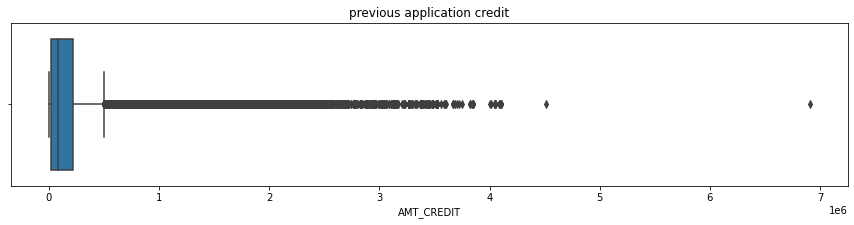

In [75]:
plt.figure(figsize=[15,3])
sns.boxplot("AMT_CREDIT",data=PData);
plt.title("previous application credit");

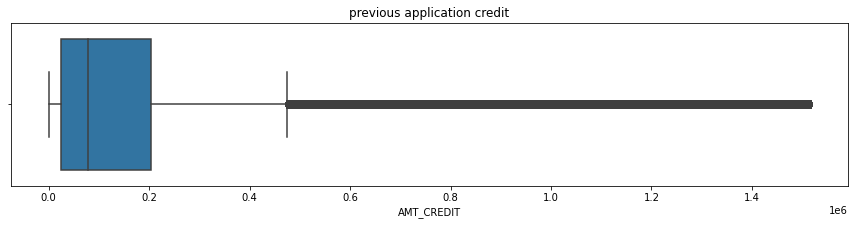

In [76]:
PData=PData[PData["AMT_CREDIT"]<PData["AMT_CREDIT"].quantile([0.99][0])]

plt.figure(figsize=[15,3])
sns.boxplot("AMT_CREDIT",data=PData);
plt.title("previous application credit");

# Imputation of missing value in PreviousData

In [77]:
# product_combination contain null valuea so we impute by mode().
PData["PRODUCT_COMBINATION"]=PData["PRODUCT_COMBINATION"].fillna(PData["PRODUCT_COMBINATION"].mode()[0])

In [78]:
PData["NAME_CLIENT_TYPE"].value_counts()

Repeater     1216026
New           300887
Refreshed     134674
XNA             1923
Name: NAME_CLIENT_TYPE, dtype: int64

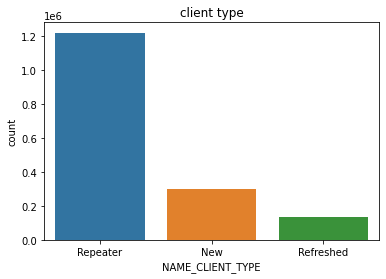

In [79]:
PData["NAME_CLIENT_TYPE"]=PData["NAME_CLIENT_TYPE"].replace("XNA",PData["NAME_CLIENT_TYPE"].mode()[0])
sns.countplot(PData["NAME_CLIENT_TYPE"])
plt.title("client type");

In [80]:
PData["NAME_PRODUCT_TYPE"].value_counts()

XNA        1063505
x-sell      445686
walk-in     144319
Name: NAME_PRODUCT_TYPE, dtype: int64

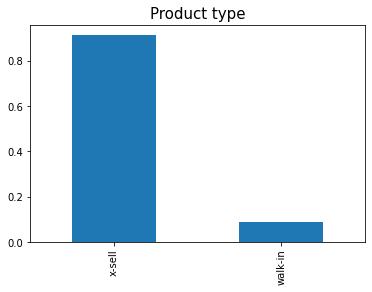

In [81]:
PData["NAME_PRODUCT_TYPE"]=PData["NAME_PRODUCT_TYPE"].replace('XNA',"x-sell")
PData["NAME_PRODUCT_TYPE"].value_counts(normalize=True).plot.bar()
plt.title("Product type",fontsize=15);

In [82]:
PData["NAME_GOODS_CATEGORY"].value_counts()

XNA                         934174
Mobile                      224708
Consumer Electronics        121575
Computers                   105769
Audio/Video                  99440
Furniture                    53607
Photo / Cinema Equipment     25021
Construction Materials       24993
Clothing and Accessories     23550
Auto Accessories              7381
Jewelry                       6290
Homewares                     5023
Medical Supplies              3843
Vehicles                      3359
Sport and Leisure             2981
Gardening                     2668
Other                         2554
Office Appliances             2333
Tourism                       1659
Medicine                      1550
Direct Sales                   446
Fitness                        209
Additional Service             128
Education                      107
Weapon                          77
Insurance                       64
Animals                          1
Name: NAME_GOODS_CATEGORY, dtype: int64

In [83]:
PData["NAME_GOODS_CATEGORY"]=PData["NAME_GOODS_CATEGORY"].replace("XNA","Other")

In [84]:
PData["NAME_PAYMENT_TYPE"].value_counts()

Cash through the bank                        1019274
XNA                                           625025
Non-cash from your account                      8140
Cashless from the account of the employer       1071
Name: NAME_PAYMENT_TYPE, dtype: int64

In [85]:
PData["NAME_PAYMENT_TYPE"]=PData["NAME_PAYMENT_TYPE"].replace("XNA",PData["NAME_PAYMENT_TYPE"].mode()[0])

In [86]:
pd.DataFrame(round(PData.isnull().sum()/PData.shape[0]*100,2),columns=["Null%"])

,Null%
SK_ID_PREV,0.0
SK_ID_CURR,0.0
NAME_CONTRACT_TYPE,0.0
AMT_APPLICATION,0.0
AMT_CREDIT,0.0
WEEKDAY_APPR_PROCESS_START,0.0
HOUR_APPR_PROCESS_START,0.0
FLAG_LAST_APPL_PER_CONTRACT,0.0
NFLAG_LAST_APPL_IN_DAY,0.0
NAME_CASH_LOAN_PURPOSE,0.0


In [87]:
# In previous data having around 1600000 rows,so we drop some rows for analysis
PData2=PData.iloc[:80000]

## Adding suffix to col name after merging

In [88]:
#merging to dataframe
combined=pd.merge(AData,PData2,how="left",on=["SK_ID_CURR"],suffixes="_x")

In [89]:
combined.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_', 'Credit_Range', 'Income_Range', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START_',
       'HOUR_APPR_PROCESS_START_', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', '

In [90]:
# shape of merged dataframe
combined.shape,AData.shape

((254647, 79), (246128, 57))

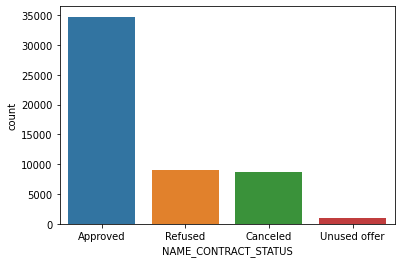

In [91]:
sns.countplot(combined.NAME_CONTRACT_STATUS);

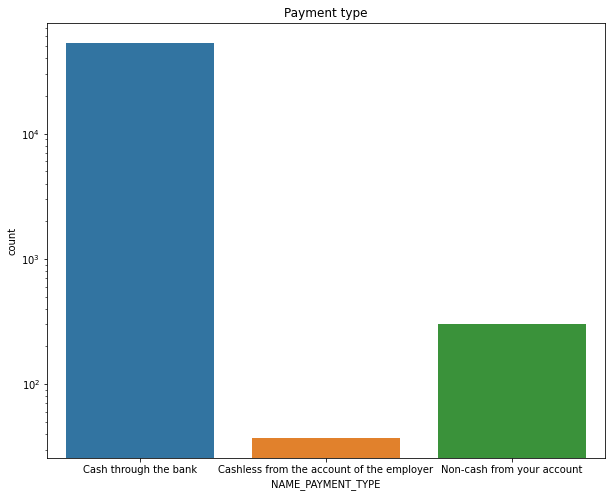

In [92]:
plt.figure(figsize=[10,8])
sns.countplot(combined ["NAME_PAYMENT_TYPE"])
plt.title("Payment type");
plt.yscale('log')

**`inference`**
- **Here we observed that most of the customer use cash to pay a loan**
- **And least payment mode uses by clients are cashless from bank of the account means online payment**

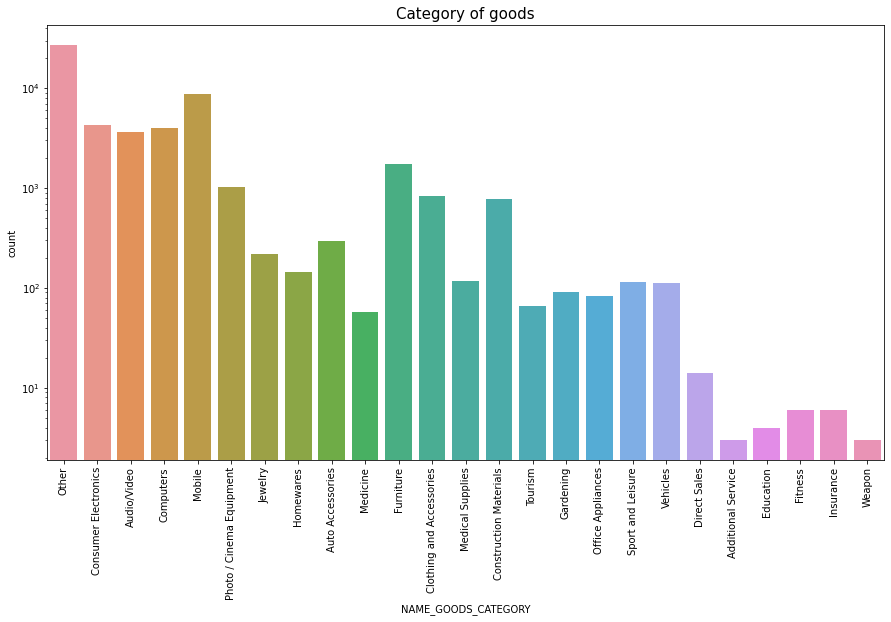

In [93]:
plt.figure(figsize=[15,8])
sns.countplot(combined ["NAME_GOODS_CATEGORY"])
plt.title("Category of goods",fontsize=15);
plt.yscale('log')
plt.xticks(rotation=90);

In [94]:
#looking types of contract status
combined["NAME_CONTRACT_STATUS"].value_counts()

Approved        34744
Refused          9067
Canceled         8737
Unused offer     1057
Name: NAME_CONTRACT_STATUS, dtype: int64

In [95]:
# create different df as per contract status
approved=combined[combined["NAME_CONTRACT_STATUS"]=="Approved"]
refused=combined[combined["NAME_CONTRACT_STATUS"]=="Refused"]
canceled=combined[combined["NAME_CONTRACT_STATUS"]=="Canceled"]
unused_offer=combined[combined["NAME_CONTRACT_STATUS"]=="Unused offer"]

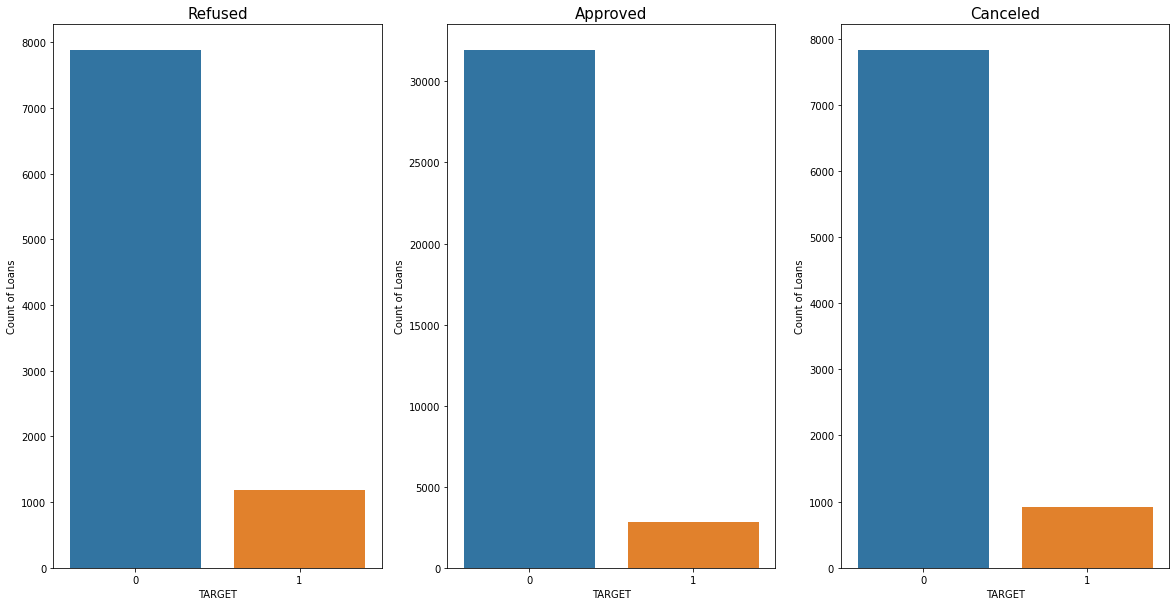

In [96]:
# plotting target va Refused,Approved,Canceled
plt.figure(figsize=[20,10])
plt.subplot(1,3,1)
sns.countplot(x=refused["TARGET"], data=refused, order= refused["TARGET"].value_counts().index)
plt.title("Refused", fontsize=15)
plt.xlabel("TARGET")
plt.ylabel("Count of Loans");

plt.subplot(1,3,2)
sns.countplot(x=approved["TARGET"], data=approved,order=approved["TARGET"].value_counts().index)
plt.xlabel("TARGET")
plt.ylabel("Count of Loans")
plt.title("Approved", fontsize=15)
plt.subplot(1,3,3)

sns.countplot(x=canceled["TARGET"], data=canceled, order= canceled["TARGET"].value_counts().index,)
plt.title("Canceled", fontsize=15)
plt.xlabel("TARGET")
plt.ylabel("Count of Loans")
plt.show()


**`inference`**
- **Loans which are previosly refused or cancelled have higher default count than approved.**

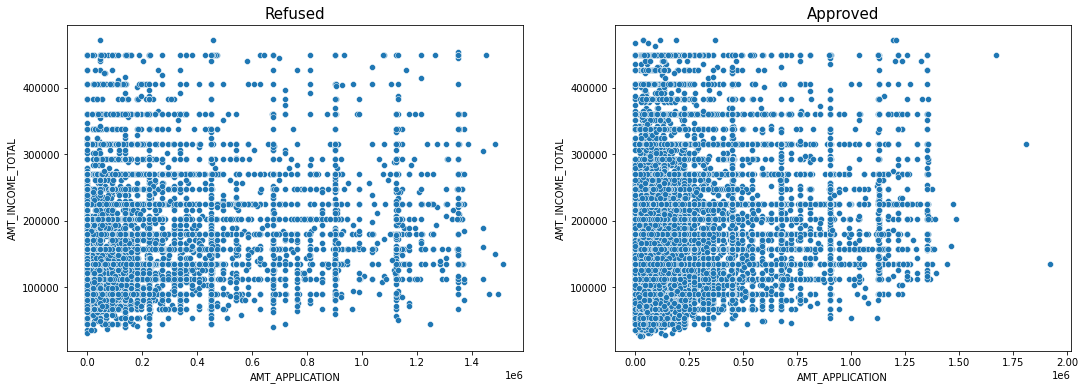

In [97]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.scatterplot(x='AMT_APPLICATION',y='AMT_INCOME_TOTAL',data=refused)
plt.title('Refused', fontsize=15)

plt.subplot(1,2,2)
sns.scatterplot(x='AMT_APPLICATION',y='AMT_INCOME_TOTAL',data=approved)
plt.title('Approved',fontsize=15)
plt.show()

**`inference`**
- **Loans request higher than 200000 had a higher rejection rate.Also loan reject rate less if income more than 500000**

**`conclusion`**

1. Company need to make awareness about revolving loan type ,Because Revolving loan are flexible ,You’ll Pay Less Interest Than You Would With Credit Card . Defaulter count be less so these make company profitable.
2. Contact with student ,pensioner ,Business because they are pay loan regularly.
3. Company need to check portfolio of person having living in house /apartment before giving loan.
4. If the client income is less , then check for his other source of income before giving loan,as he eligible to pay loan.
5. Contact with above 35 year person are eligible to pay loan regularly.